This python script uses the k-means algorith to find clusters of data for optical comunication signals. The features are the power and frequency of the signals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
import pickle # to save the model

## Load the dataset

In [2]:
df = pd.read_csv('Optical-Signals.dat')

## Explore the dataset

In [3]:
df.head()

,Power,Frequency
0,32.398590,535.229547
1,44.124688,69.598168
2,40.767889,485.462484
3,11.501306,350.502873
4,10.833255,286.586395


In [4]:
df.describe()

,Power,Frequency
count,300.000000,300.000000
mean,31.646271,318.156213
std,15.838532,152.437785
min,0.083025,0.136728
25%,15.561082,162.458602
50%,36.458522,340.064485
75%,44.577177,451.902063
max,59.272259,576.917503


## Scale the features

In [5]:
X = scale(df)
x1 = X[:,0]
x2 = X[:,1]

## Plot the dataset

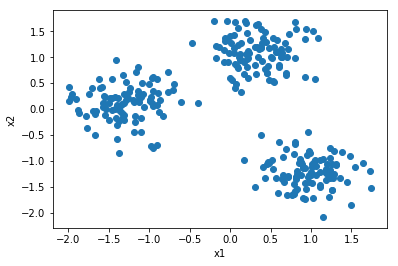

In [6]:
plt.scatter(x1,x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Train the model

In [7]:
model = KMeans(n_clusters=3, init ='k-means++')
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
model.cluster_centers_

array([[-1.28965123,  0.11637183],
       [ 0.9639734 , -1.21326485],
       [ 0.32567783,  1.09689303]])

In [9]:
model.inertia_ #Cost Function

61.276061188510496

## Plot predictions

In [10]:
color = pd.Series(model.predict(X)).map({0:'blue', 1:'red', 2:'green'})

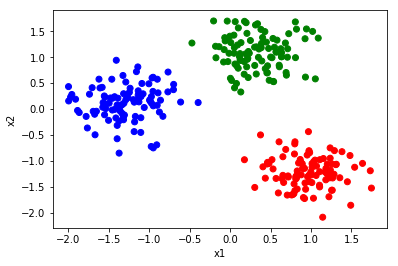

In [11]:
plt.scatter(x1,x2,c=color)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Calculate the cost function J(k)

In [12]:
K = np.arange(1, 10)
J = []

for k in K:
  test_model = KMeans(n_clusters=k, init ='k-means++')
  test_model.fit(X)
  J.append(test_model.inertia_)

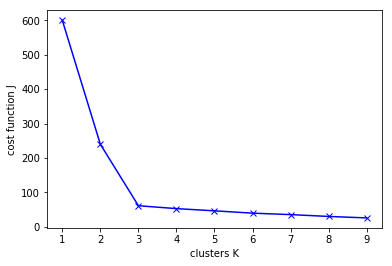

In [13]:
plt.plot(K, J, 'bx-')
plt.xlabel('clusters K')
plt.ylabel('cost function J')
plt.show()

## Save the model

In [14]:
pickle.dump(model, open('model.sav','w'))